# Régression logistique en 2D

Prédire la couleur d'un vin à partir de ses composants.

In [1]:
%matplotlib inline

In [2]:
from papierstat.datasets import load_wines_dataset
data = load_wines_dataset()
X = data.drop(['quality', 'color'], axis=1)
y = data['color']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from statsmodels.discrete.discrete_model import Logit
model = Logit(y_train == "white", X_train)
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.046021
         Iterations 11


In [5]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               No. Iterations:      11.0000 
Dependent Variable:    color               Pseudo R-squared:    0.917   
Date:                  2018-02-07 01:26    AIC:                 470.4239
No. Observations:      4872                BIC:                 541.8278
Df Model:              10                  Log-Likelihood:      -224.21 
Df Residuals:          4861                LL-Null:             -2691.4 
Converged:             1.0000              Scale:               1.0000  
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
fixed_acidity         -1.3600   0.1462  -9.3027 0.0000  -1.6465  -1.0734
volatile_acidity     -11.5963   0.9996 -11.6010 0.0000 -13.5555  -9.6371
citric_acid            1.4407   1.1472   1.2558 0.2092  -0.8078   3.6891
residual_sugar         0.1098   0.0605   1.8159 0.0694  -0.0087   0.2283
chlorides            -35.5658   4.0502  -8.7812 0.0000 -43.5041 -27.6275
free_sulfur_dioxide   -0.0474   0.0144  -3.2934 0.0010  -0.0756  -0.0192
total_sulfur_dioxide   0.0658   0.0052  12.6952 0.0000   0.0557   0.0760
density               41.3333   4.2092   9.8199 0.0000  33.0836  49.5831
pH                    -8.4850   0.9888  -8.5815 0.0000 -10.4229  -6.5470
sulphates             -8.8332   1.0742  -8.2232 0.0000 -10.9386  -6.7279
alcohol                0.3534   0.1236   2.8586 0.0043   0.1111   0.5958
========================================================================

"""

On ne garde que les deux premières.

In [6]:
X_train2 = X_train.iloc[:, :2]

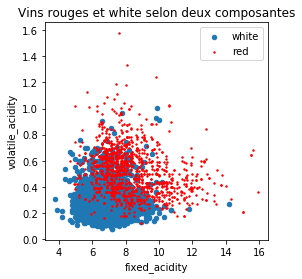

In [7]:
import pandas
df = pandas.DataFrame(X_train2.copy())
df['y'] = y_train

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df[df.y == "white"].plot(x="fixed_acidity", y="volatile_acidity", ax=ax, kind='scatter', label="white")
df[df.y == "red"].plot(x="fixed_acidity", y="volatile_acidity", ax=ax,
                       kind='scatter', label="red", color="red", s=2)
ax.set_title("Vins rouges et white selon deux composantes");

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train2, y_train == "white")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
model.coef_, model.intercept_

(array([[ -0.87684535, -10.7079463 ]]), array([11.67537869]))

On trace cette droite sur le graphique.

In [10]:
x0 = 4
y0 = -(model.coef_[0,0] * x0 + model.intercept_) / model.coef_[0,1]
x1 = 12
y1 = -(model.coef_[0,0] * x1 + model.intercept_) / model.coef_[0,1]
x0, y0, x1, y1

(4, array([0.76279775]), 12, array([0.10769895]))

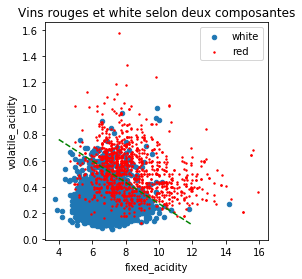

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df[df.y == "white"].plot(x="fixed_acidity", y="volatile_acidity", ax=ax, kind='scatter', label="white")
df[df.y == "red"].plot(x="fixed_acidity", y="volatile_acidity", ax=ax,
                       kind='scatter', label="red", color="red", s=2)
ax.plot([x0, x1], [y0, y1], 'g--')
ax.set_title("Vins rouges et white selon deux composantes");